**O script a seguir visa guiá-lo(a) para que você consiga juntar arquivos CSV em um único arquivo. Tecnicamente, o nome da ação de juntar vários arquivos em um só é denominada de *concatenação*.**

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# definindo meu diretório de trabalho
# mude o caminho a seguir para corresponder ao caminho da pasta que você pretende usar
raw_data = "C:/Users/limap/OneDrive/Área de Trabalho/Aula 041 – Juntando Arquivos CSV com o Python/mentalRotation/data/data_csv/"
os.chdir(raw_data)

In [3]:
pwd

'C:\\Users\\limap\\OneDrive\\Área de Trabalho\\Aula 041 – Juntando Arquivos CSV com o Python\\mentalRotation\\data\\data_csv'

In [4]:
# criando lista de nomes dos arquivos
file_extension = ".csv"
all_filenames = [i for i in glob.glob(f"*{file_extension}")] # armazena nome dos arquivos em uma lista
all_filenames

['ana_2022-12-31_00h59.07.521.csv',
 'bia_2022-12-31_01h03.34.738.csv',
 'cris_2022-12-31_01h19.46.257.csv',
 'davi_2022-12-31_01h23.27.650.csv',
 'edu_2022-12-31_01h27.05.156.csv',
 'fabi_2022-12-31_01h35.07.697.csv',
 'gabi_2022-12-31_01h40.20.488.csv',
 'helô_2022-12-31_01h44.53.102.csv',
 'iago_2022-12-31_01h49.39.183.csv',
 'jack_2022-12-31_01h54.15.243.csv',
 'kily_2022-12-31_09h19.34.502.csv',
 'lela_2022-12-31_09h23.06.820.csv']

In [5]:
# armazenando os dados de todos os arquivos em um único dataframe
data = pd.concat([pd.read_csv(file, delimiter = ",", encoding = "UTF-8")
                 for file in all_filenames]) # "latin-1"

data.shape # indica tamanho do dataframe com dados concatenados

(1944, 38)

In [6]:
data.head(5)

,leftori,rightori,same,corrAns,angle,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,instr_txt_1.started,...,mini_pause.stopped,end_txt.started,end_key.started,session,participant,date,expName,psychopyVersion,frameRate,Unnamed: 37
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.407198,...,NaN,NaN,NaN,1.0,ana,2022-12-31_00h59.07.521,MentalRot,2022.2.1,60.051692,NaN
1,0.0,225.0,n,n,225.0,0.0,0.0,0.0,10.0,NaN,...,25.875416,NaN,NaN,1.0,ana,2022-12-31_00h59.07.521,MentalRot,2022.2.1,60.051692,NaN
2,0.0,225.0,y,m,225.0,0.0,1.0,1.0,11.0,NaN,...,27.127254,NaN,NaN,1.0,ana,2022-12-31_00h59.07.521,MentalRot,2022.2.1,60.051692,NaN
3,0.0,0.0,n,n,0.0,0.0,2.0,2.0,0.0,NaN,...,28.359538,NaN,NaN,1.0,ana,2022-12-31_00h59.07.521,MentalRot,2022.2.1,60.051692,NaN
4,0.0,90.0,y,m,90.0,0.0,3.0,3.0,5.0,NaN,...,29.493002,NaN,NaN,1.0,ana,2022-12-31_00h59.07.521,MentalRot,2022.2.1,60.051692,NaN


In [7]:
data["participant"].unique()

array(['ana', nan, 'bia', 'cris', 'davi', 'edu', 'fabi', 'gabi', 'helô',
       'iago', 'jack', 'kily', 'lela'], dtype=object)

In [8]:
# gerando um banco de dados para as análises principais
data2 = data[["participant", "same", "angle", "response.corr", "response.rt"]]
data2.shape

(1944, 5)

In [9]:
data2.head(5)

,participant,same,angle,response.corr,response.rt
0,ana,NaN,NaN,NaN,NaN
1,ana,n,225.0,1.0,1.396049
2,ana,y,225.0,1.0,0.724670
3,ana,n,0.0,1.0,0.705989
4,ana,y,90.0,1.0,0.592835


In [10]:
# desempenho por participante e pelas duas VIs
data2.groupby(by = ["participant", "same", "angle"], dropna = True)["response.corr"].mean()

participant  same  angle
ana          n     0.0      1.0
                   45.0     0.9
                   90.0     0.9
                   135.0    0.9
                   180.0    1.0
                           ... 
lela         y     135.0    1.0
                   180.0    0.9
                   225.0    1.0
                   270.0    1.0
                   315.0    1.0
Name: response.corr, Length: 192, dtype: float64

In [11]:
# desempenho pelas duas VIs
data2.groupby(by = ["same", "angle"], dropna = True)["response.corr"].mean()

same  angle
n     0.0      0.983333
      45.0     0.983333
      90.0     0.975000
      135.0    0.975000
      180.0    0.983333
      225.0    0.991667
      270.0    0.950000
      315.0    0.975000
y     0.0      0.991667
      45.0     0.991667
      90.0     0.975000
      135.0    0.941667
      180.0    0.950000
      225.0    0.883333
      270.0    0.866667
      315.0    0.975000
Name: response.corr, dtype: float64

In [12]:
# selecionando apenas respostas corretas
data3_onlycorrect = data2[data2["response.corr"] == 1.0] # seleciona só acertos
data3_onlycorrect.shape

(1847, 5)

In [13]:
# checa se selecionamos apenas respostas corretas
data3_onlycorrect.groupby(by = ["same", "angle"], dropna = True)["response.corr"].mean()

same  angle
n     0.0      1.0
      45.0     1.0
      90.0     1.0
      135.0    1.0
      180.0    1.0
      225.0    1.0
      270.0    1.0
      315.0    1.0
y     0.0      1.0
      45.0     1.0
      90.0     1.0
      135.0    1.0
      180.0    1.0
      225.0    1.0
      270.0    1.0
      315.0    1.0
Name: response.corr, dtype: float64

In [14]:
# tempo de reação por participante e pelas duas VIs
data3_onlycorrect.groupby(by = ["participant", "same", "angle"], dropna = True)["response.rt"].mean()

participant  same  angle
ana          n     0.0      0.624469
                   45.0     0.596599
                   90.0     0.661857
                   135.0    0.730083
                   180.0    0.964021
                              ...   
lela         y     135.0    0.553138
                   180.0    0.679358
                   225.0    0.565061
                   270.0    0.601676
                   315.0    0.536062
Name: response.rt, Length: 192, dtype: float64

In [15]:
# tempo de reação pelas duas VIs
data3_onlycorrect.groupby(by = ["same", "angle"], dropna = True)["response.rt"].mean().round(3)

same  angle
n     0.0      0.569
      45.0     0.582
      90.0     0.667
      135.0    0.688
      180.0    0.750
      225.0    0.719
      270.0    0.665
      315.0    0.580
y     0.0      0.514
      45.0     0.526
      90.0     0.592
      135.0    0.615
      180.0    0.682
      225.0    0.662
      270.0    0.620
      315.0    0.546
Name: response.rt, dtype: float64

In [16]:
# dividindo dados por condições # (1847, 5)
same = data3_onlycorrect[data3_onlycorrect["same"] == "y"]
different = data3_onlycorrect[data3_onlycorrect["same"] == "n"]

In [17]:
same.shape

(909, 5)

In [18]:
different.shape

(938, 5)

In [19]:
# calculando as médias das condições
same_mean = same.groupby(by = ["angle"], dropna = True)["response.rt"].mean()
different_mean = different.groupby(by = ["angle"], dropna = True)["response.rt"].mean()

print(same_mean)
print(different_mean)

angle
0.0      0.513561
45.0     0.525693
90.0     0.592292
135.0    0.614801
180.0    0.681593
225.0    0.662427
270.0    0.619744
315.0    0.545914
Name: response.rt, dtype: float64
angle
0.0      0.568503
45.0     0.582247
90.0     0.666788
135.0    0.688463
180.0    0.749819
225.0    0.718906
270.0    0.664620
315.0    0.580146
Name: response.rt, dtype: float64


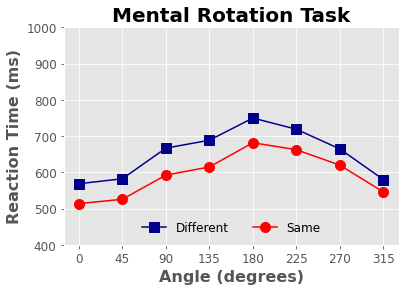

In [20]:
# plotando os resultados em um gráfico
plt.style.use("ggplot")

plt.rcParams.update({"font.size": 16})

angles = list(range(0, 316, 45))

plt.plot(angles, different_mean * 1000, color = "darkblue",
         label = "Different", marker = "s", markersize = 10)
plt.plot(angles, same_mean * 1000, color = "red",
         label = "Same", marker = "o", markersize = 10)

# Espaçamento das marcas dos eixos x e y
plt.xticks(angles, fontsize = 12)
plt.yticks(list(range(400, 1100, 100)), fontsize = 12)

# Rótulos dos eixos x e y
plt.xlabel("Angle (degrees)", fontsize = 16, fontweight = "bold")
plt.ylabel("Reaction Time (ms)", fontsize = 16, fontweight = "bold")

# Título do gráfico
plt.title("Mental Rotation Task", fontsize = 20, fontweight = "bold")

# Legenda
plt.legend(prop = {"size": 12}, loc = "lower center", ncol = 2, frameon = False)

plt.savefig("Figura 1.jpg", dpi = 600, bbox_inches = "tight")

plt.show()

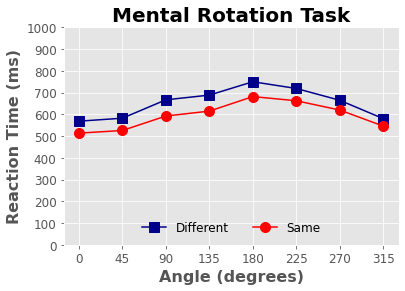

In [21]:
# plotando os resultados em um gráfico
plt.style.use("ggplot")

plt.rcParams.update({"font.size": 16})

angles = list(range(0, 316, 45))

plt.plot(angles, different_mean * 1000, color = "darkblue",
         label = "Different", marker = "s", markersize = 10)
plt.plot(angles, same_mean * 1000, color = "red",
         label = "Same", marker = "o", markersize = 10)

# Espaçamento das marcas dos eixos x e y
plt.xticks(angles, fontsize = 12)
plt.yticks(list(range(0, 1100, 100)), fontsize = 12)

# Rótulos dos eixos x e y
plt.xlabel("Angle (degrees)", fontsize = 16, fontweight = "bold")
plt.ylabel("Reaction Time (ms)", fontsize = 16, fontweight = "bold")

# Título do gráfico
plt.title("Mental Rotation Task", fontsize = 20, fontweight = "bold")

# Legenda
plt.legend(prop = {"size": 12}, loc = "lower center", ncol = 2, frameon = False)

plt.savefig("Figura 2.jpg", dpi = 600, bbox_inches = "tight")

plt.show()

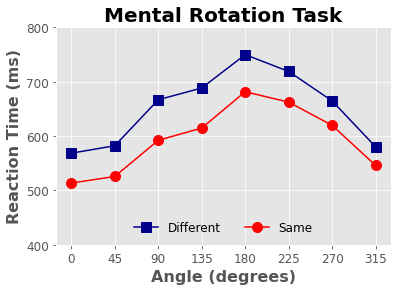

In [22]:
# plotando os resultados em um gráfico
plt.style.use("ggplot")

plt.rcParams.update({"font.size": 16})

angles = list(range(0, 316, 45))

plt.plot(angles, different_mean * 1000, color = "darkblue",
         label = "Different", marker = "s", markersize = 10)
plt.plot(angles, same_mean * 1000, color = "red",
         label = "Same", marker = "o", markersize = 10)

# Espaçamento das marcas dos eixos x e y
plt.xticks(angles, fontsize = 12)
plt.yticks(list(range(400, 900, 100)), fontsize = 12)

# Rótulos dos eixos x e y
plt.xlabel("Angle (degrees)", fontsize = 16, fontweight = "bold")
plt.ylabel("Reaction Time (ms)", fontsize = 16, fontweight = "bold")

# Título do gráfico
plt.title("Mental Rotation Task", fontsize = 20, fontweight = "bold")

# Legenda
plt.legend(prop = {"size": 12}, loc = "lower center", ncol = 2, frameon = False)

plt.savefig("Figura 3.jpg", dpi = 600, bbox_inches = "tight")

plt.show()

In [23]:
# Daqui para baixo, conteúdo não foi abordado no vídeo

# Calculando os erros padrões das médias
N = 12
same_sem = same.groupby(by = ["angle"], dropna = True)["response.rt"].std(ddof = 1) / np.sqrt(N)
different_sem = different.groupby(by = ["angle"], dropna = True)["response.rt"].std(ddof = 1) / np.sqrt(N)

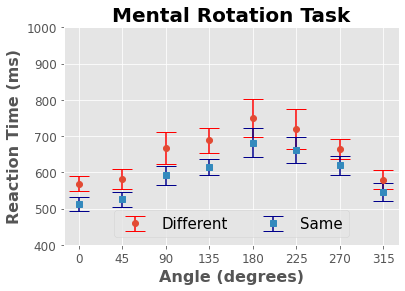

In [24]:
# Figura 01

plt.style.use("ggplot")

plt.rcParams.update({'font.size': 16})


(_, caps, _) = plt.errorbar(list(range(0, 316, 45)), different_mean * 1000, yerr = different_sem * 1000,
             label = "Different", fmt ='o', ecolor = "red", capsize = 10)

for cap in caps:
    cap.set_markeredgewidth(1)


(_, caps, _) = plt.errorbar(list(range(0, 316, 45)), same_mean * 1000, yerr = same_sem * 1000,
             label = "Same", fmt ='s', ecolor = "darkblue", capsize = 10)

for cap in caps:
    cap.set_markeredgewidth(1)

plt.xticks(list(range(0, 316, 45)), fontsize = 12)
plt.yticks(list(range(400, 1100, 100)), fontsize = 12)
plt.ylim(400, 1000)

plt.xlabel("Angle (degrees)", fontsize = 16, fontweight = "bold")
plt.ylabel("Reaction Time (ms)", fontsize = 16, fontweight = "bold")

plt.title("Mental Rotation Task", fontsize = 20, fontweight = "bold")

plt.legend(prop = {'size': 15}, loc = "lower center", ncol = 2)

plt.savefig("Figura 4.jpg", dpi = 600, bbox_inches = "tight")

plt.show()